In [48]:
from torch.autograd import Variable
import torch.nn as nn
import torch
from LSTMModel import lstm
from parser_my import args
from dataset import getData
import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [21]:
close_max, close_min, train_loader, test_loader = getData(args.corpusFile,args.sequence_length,args.batch_size )

In [24]:
model = lstm(input_size=args.input_size, hidden_size=args.hidden_size, num_layers=args.layers , output_size=1, dropout=args.dropout, batch_first=args.batch_first) #创建LSTM()类的一个对象
model.to(args.device) #调用可用设备
criterion = nn.MSELoss()  # 定义损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)  # Adam梯度下降  学习率=0.001，对于优化器函数，我们将使用adam优化器


In [43]:
args.input_size,args.hidden_size,args.layers

(9, 32, 2)

In [25]:
model

lstm(
  (rnn): LSTM(9, 32, num_layers=2, batch_first=True, dropout=0.1)
  (linear): Linear(in_features=32, out_features=1, bias=True)
)

In [26]:
train_loader

In [35]:
s=0
for idx, (data, label) in enumerate(train_loader):
#     s=s+len(label)
    print(idx,label)

0 tensor([0.2870, 0.4511, 0.0994, 0.3691, 0.2011, 0.1330, 0.0349, 0.5980, 0.1822,
        0.2188, 0.3137, 0.1284, 0.2154, 0.1901, 0.3398, 0.1152, 0.1980, 0.2000,
        0.1146, 0.3410, 0.1349, 0.4229, 0.3224, 0.2139, 0.1294, 0.0369, 0.1133,
        0.1010, 0.3302, 0.3975, 0.3472, 0.0736, 0.1777, 0.3781, 0.4146, 0.0964,
        0.0638, 0.0347, 0.0696, 0.1220, 0.1186, 0.3534, 0.4018, 0.4314, 0.0920,
        0.1864, 0.3739, 0.1009, 0.8708, 0.3034, 0.3538, 0.3712, 0.5108, 0.1096,
        0.2711, 0.1523, 0.4408, 0.2459, 0.0706, 0.0846, 0.0207, 0.3036, 0.0777,
        0.4279])
1 tensor([0.3602, 0.4722, 0.0779, 0.2047, 0.4168, 0.8629, 0.2221, 0.1282, 0.0740,
        0.2170, 0.1385, 0.3682, 0.2538, 0.1861, 0.0068, 0.0349, 0.3730, 0.4074,
        0.2475, 0.4115, 0.6266, 0.2999, 0.0675, 0.0194, 0.3638, 0.3795, 0.0887,
        0.3389, 0.0835, 0.0253, 0.1893, 0.2587, 0.2401, 0.1400, 0.3975, 0.2535,
        0.3013, 0.4341, 0.3879, 0.2076, 0.2888, 0.4626, 0.1502, 0.2140, 0.3889,
        0.0791, 0.0

In [34]:
data

tensor([[[[0.3491, 0.3604, 0.3602, 0.3421, 0.3582, 0.4369, 0.3855, 0.1224,
           0.0640],
          [0.3599, 0.3502, 0.3617, 0.3488, 0.3491, 0.5800, 0.5782, 0.0874,
           0.0480],
          [0.3710, 0.3652, 0.3706, 0.3672, 0.3599, 0.5822, 0.5791, 0.1001,
           0.0555],
          [0.3772, 0.3755, 0.3740, 0.3715, 0.3710, 0.5468, 0.5308, 0.1014,
           0.0555],
          [0.3792, 0.3815, 0.3806, 0.3755, 0.3772, 0.5163, 0.4909, 0.1226,
           0.0677]]],


        [[[0.0548, 0.0548, 0.0534, 0.0555, 0.0541, 0.5076, 0.4882, 0.0148,
           0.0060],
          [0.0555, 0.0557, 0.0557, 0.0542, 0.0548, 0.5074, 0.4876, 0.0192,
           0.0083],
          [0.0507, 0.0565, 0.0536, 0.0532, 0.0555, 0.4678, 0.3721, 0.0156,
           0.0065],
          [0.0480, 0.0513, 0.0486, 0.0495, 0.0507, 0.4831, 0.4157, 0.0133,
           0.0055],
          [0.0457, 0.0491, 0.0466, 0.0484, 0.0480, 0.4852, 0.4212, 0.0124,
           0.0051]]],


        [[[0.0340, 0.0323, 0.0322, 0.0341,

In [38]:
data1 = data.squeeze(1)
data1.shape

torch.Size([4, 5, 9])

In [47]:
Variable(data1).shape

torch.Size([4, 5, 9])

In [49]:
pred = model(Variable(data1))

RuntimeError: shape '[1, 5, 32]' is invalid for input of size 640

In [1]:
from LSTMModel import lstm
from dataset import getData
from parser_my import args
import torch
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
model = lstm(input_size=args.input_size, hidden_size=args.hidden_size, num_layers=args.layers , output_size=1)

In [3]:
model.to(args.device)
checkpoint = torch.load(args.save_file)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [4]:
model

lstm(
  (rnn): LSTM(9, 32, num_layers=2, batch_first=True)
  (linear): Linear(in_features=32, out_features=1, bias=True)
)

预测值是2886.12,真实值是2898.05
预测值是2817.90,真实值是2838.49
预测值是3009.97,真实值是2987.93
预测值是2826.32,真实值是2728.76
预测值是2966.51,真实值是2996.76
预测值是2792.19,真实值是2827.28
预测值是2894.07,真实值是2926.90
预测值是2729.98,真实值是2780.64
预测值是2887.03,真实值是2867.92
预测值是3043.77,真实值是3050.12
预测值是2754.38,真实值是2660.17
预测值是3025.69,真实值是3011.67
预测值是2757.13,真实值是2734.52
预测值是2799.00,真实值是2819.93
预测值是2842.77,真实值是2827.01
预测值是2914.41,真实值是2906.07
预测值是2838.75,真实值是2779.64
预测值是3070.32,真实值是3104.80
预测值是2776.07,真实值是2702.13
预测值是2961.37,真实值是2746.61
预测值是2717.56,真实值是2781.59
预测值是2872.37,真实值是2866.51
预测值是2861.67,真实值是2868.46
预测值是2822.94,真实值是2815.37
预测值是2779.38,真实值是2763.99
预测值是2971.91,真实值是3007.35
预测值是2995.65,真实值是2962.75
预测值是2780.89,真实值是2747.21
预测值是2814.26,真实值是2817.97
预测值是2997.67,真实值是2991.33
预测值是2847.24,真实值是2915.43
预测值是2829.13,真实值是2846.55
预测值是2801.29,真实值是2822.44
预测值是2879.78,真实值是2789.25
预测值是2777.51,真实值是2764.91
预测值是2915.59,真实值是2921.40
预测值是3024.17,真实值是3017.07
预测值是2839.57,真实值是2836.80
预测值是2827.13,真实值是2808.53
预测值是3036.21,真实值是3013.05
预测值是2857.77,真实值是2878.14
预测值是3083.44,真实值是

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/zy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24065 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Us

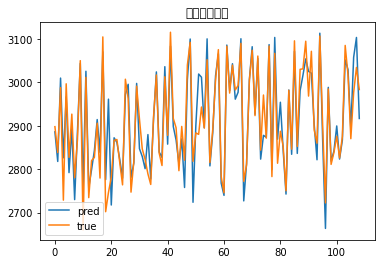

In [11]:
preds = []
labels = []
close_max, close_min, train_loader, test_loader = getData(args.corpusFile, args.sequence_length, args.batch_size)
for idx, (x, label) in enumerate(test_loader):
    if args.useGPU:
        x = x.squeeze(1).cuda()  # batch_size,seq_len,input_size
    else:
        x = x.squeeze(1)
    pred = model(x)
    list = pred.data.squeeze(1).tolist()
    preds.extend(list[-1])
    labels.extend(label.tolist())

result_t = []
result_m = []

for i in range(len(preds)):
    print('预测值是%.2f,真实值是%.2f' % (
    preds[i] * (close_max - close_min) + close_min, labels[i] * (close_max - close_min) + close_min))

    t = preds[i] * (close_max - close_min) + close_min
    result_t.append(t)
    m = labels[i] * (close_max - close_min) + close_min
    result_m.append(m)

x = range(len(result_t))
#print(result_m)
#print(x)

plt.plot(x, result_t, label='pred')
plt.plot(x, result_m, label='true')

plt.title("加密货币预测")  # 标题

plt.legend()


In [7]:
len(preds)

109

In [9]:
len(labels)

109